# **Project Introduction**

For the sole purpose of this project, our group decided to collect data via a google forms survey that we first distributed to our surrounding circles and in the coming month will additionally distribute to many others around campus and the greater Chicago Area. The form consists of 8 questions. The questions are as follows.


---




###1.   What are you sharing info about?




*   Breakup
*   New Relationship/Situationship
*   Both
---
###2.   What month did you start your new relationship/situationship?


*   N/A

*   January

*   February

*   March

*   April

*   May
*   June


*   July


*   August


*   September


*   October


*   November

*   December

---
###3. What month was your last breakup?

*   N/A

*   January

*   February

*   March

*   April

*   May
*   June


*   July


*   August


*   September


*   October


*   November

*   December
---
###4. How long was your last relationship/situationship before it ended?
* N/A
* Less than 3 months
* 3 - 6 months
* 6 - 9 months
* 9 months - 1.5 years
* 1.5 - 2.5 years
* 2.5 - 4 years
* 4+ years
---
###5. How long are you currently in this new relationship/situationship?
* N/A
* Less than 3 months
* 3 - 6 months
* 6 - 9 months
* 9 months - 1.5 years
* 1.5 - 2.5 years
* 2.5 - 4 years
* 4+ years
---
###6. How satisfied did you feel about your last relationship/situationship breakup?
* N/A
* Strongly Dissatisfied
* Somewhat Unsatisfied
* Neutral
* Somewhat Satisfied
* Strongly Satisfied
---
###7. How satisfied do you feel about your new relationship/situationship?
* N/A
* Strongly Dissatisfied
* Somewhat Unsatisfied
* Neutral
* Somewhat Satisfied
* Strongly Satisfied
---
###8. How old are you?
with a set of age buckets for the responders to categorize themselves into.








---
# **Data Cleaning**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# colab-specific file access
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/FINAL REPORT 418
#Load the CSV FILE
monthTranslationTable = {'January': 1, 'February':2, 'March':3, 'April': 4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12, 'Currently Single':0, 0:0}
timeTranslationTable =  {'Less than 3 months':1, '3 - 6 months':2,'6 - 9 months':3,'9 months to a 1.5 years':4,'1.5 to 2.5 years':5,'2.5 to 4 years':6,'4+ years':7, 0:0}
satisfactionTranslationTable = {'Strongly Unsatisfied':1, 'Somewhat Unsatisfied':2, 'Neutral':3,'Somewhat Satisfied':4,'Strongly Satisfied':5,0:0}
ageTranslationTable = {'Below 18':1, '18-19':2, '19-20':3,'21-22':4,'23-24':5,'25-28':6, '29-33':7, '33-40':8, '40-50':9, '50+':10, 0:0}

def monthTranslator(toTranslate):
  return monthTranslationTable[toTranslate]
def timeTranslator(toTranslate):
  return timeTranslationTable[toTranslate]
def satisfactionTranslator(toTranslate):
   return satisfactionTranslationTable[toTranslate]
def ageTranslator(toTranslate):
  return ageTranslationTable[toTranslate]

survey_responses = pd.read_csv('Cycle of Love (Responses) - Form Responses 1.csv')
love_pruned = survey_responses[['What month did you start your new relationship/situationship?','How long was your last relationship/situationship before it ended?','How satisfied do you feel with your new relationship/situationship?', 'How old are you?']]

new_love_data = love_pruned.rename(columns = {'What month did you start your new relationship/situationship?': 'relationship_start', 'How long was your last relationship/situationship before it ended?': 'relationship_length','How satisfied do you feel with your new relationship/situationship?': 'relationship_satisfaction', 'How old are you?': 'age'})
new_love_data = new_love_data.fillna(0)
new_love_data['relationship_start'] = new_love_data['relationship_start'].map(monthTranslator)
new_love_data = new_love_data[new_love_data['relationship_start'] != 0]
new_love_data['relationship_length'] = new_love_data['relationship_length'].map(timeTranslator)
new_love_data = new_love_data[new_love_data['relationship_length'] != 0]
new_love_data['relationship_satisfaction'] = new_love_data['relationship_satisfaction'].map(satisfactionTranslator)
new_love_data = new_love_data[new_love_data['relationship_satisfaction'] != 0]
new_love_data['age'] = new_love_data['age'].map(ageTranslator)
new_love_data = new_love_data[new_love_data['age'] != 0]

display(survey_responses)

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/FINAL REPORT 418


,Timestamp,What are you sharing info about?,What month did you start your new relationship/situationship?,What month was your last breakup?,How long was your last relationship/situationship before it ended?,How long have you been in the new relationship/situationship?,How satisfied did you feel about how your last relationship/situationship breakup?,How satisfied do you feel with your new relationship/situationship?,How old are you?
0,10/25/2023 20:46:40,Both,October,August,9 months to a 1.5 years,Less than 3 months,Somewhat Satisfied,Somewhat Unsatisfied,NaN
1,10/25/2023 20:47:51,New Relationship/situationship,October,August,Less than 3 months,Less than 3 months,Strongly Unsatisfied,Strongly Satisfied,NaN
2,10/25/2023 20:53:37,Both,Currently Single,October,9 months to a 1.5 years,Less than 3 months,Strongly Satisfied,Strongly Satisfied,NaN
3,10/25/2023 20:54:09,Breakup,July,December,1.5 to 2.5 years,NaN,Strongly Unsatisfied,NaN,NaN
4,10/25/2023 20:55:38,Breakup,Currently Single,August,3 - 6 months,NaN,Somewhat Unsatisfied,NaN,NaN
...,...,...,...,...,...,...,...,...,...
85,12/1/2023 11:22:38,Both,November,NaN,9 months to a 1.5 years,4+ years,NaN,Strongly Satisfied,21-22
86,12/1/2023 15:08:05,Both,March,January,2.5 to 4 years,6 - 9 months,Strongly Unsatisfied,Strongly Unsatisfied,25-28
87,12/4/2023 15:44:20,Both,October,NaN,Less than 3 months,Less than 3 months,Neutral,Neutral,21-22
88,12/4/2023 17:25:17,New Relationship/situationship,March,NaN,NaN,9 months to a 1.5 years,NaN,Strongly Satisfied,18-19


In [2]:
hate_pruned = survey_responses[['What month was your last breakup?','How long was your last relationship/situationship before it ended?','How satisfied did you feel about how your last relationship/situationship breakup?', 'How old are you?']]

new_hate_data = hate_pruned.rename(columns = {'What month was your last breakup?': 'breakup_start', 'How long was your last relationship/situationship before it ended?': 'breakup_length','How satisfied did you feel about how your last relationship/situationship breakup?': 'breakup_satisfaction', 'How old are you?': 'age'})
new_hate_data = new_hate_data.fillna(0)
new_hate_data['breakup_start'] = new_hate_data['breakup_start'].map(monthTranslator)
new_hate_data = new_hate_data[new_hate_data['breakup_start'] != 0]
new_hate_data['breakup_length'] = new_hate_data['breakup_length'].map(timeTranslator)
new_hate_data = new_hate_data[new_hate_data['breakup_length'] != 0]
new_hate_data['breakup_satisfaction'] = new_hate_data['breakup_satisfaction'].map(satisfactionTranslator)
new_hate_data = new_hate_data[new_hate_data['breakup_satisfaction'] != 0]
new_hate_data['age'] = new_hate_data['age'].map(ageTranslator)
new_hate_data = new_hate_data[new_hate_data['age'] != 0]

display(new_hate_data)


,breakup_start,breakup_length,breakup_satisfaction,age
18,8,3,2,4
19,10,5,4,2
21,9,2,3,5
23,8,2,3,4
25,7,1,2,5
26,10,6,3,5
27,1,1,1,6
28,5,2,4,4
29,6,3,3,4
30,8,1,2,5


---
# **Exploratory Data Analysis**


First a bit of exploration into the viability of and distribution of responses.

In [3]:
hate_count = new_hate_data.shape[0]
love_count = new_love_data.shape[0]
total_count = survey_responses.shape[0]
unusableDFHate = new_hate_data.index.values.tolist()
unusableDFLove = new_love_data.index.values.tolist()
usable_list = list(set(unusableDFLove + unusableDFHate))
hate_percent = float(hate_count / total_count)
love_percent = float(love_count / total_count)
unusable_percent = float((total_count - len(usable_list)) / total_count)

print("Percent of respondees that provided valid data on their breakups is: ", hate_percent)
print("Percent of respondees that provided valid data on their new relationships is: ", love_percent)
print("Percent of respondees that provided data that is impossible to parse without resurveying is: ", unusable_percent)


Percent of respondees that provided valid data on their breakups is:  0.6444444444444445
Percent of respondees that provided valid data on their new relationships is:  0.4777777777777778
Percent of respondees that provided data that is impossible to parse without resurveying is:  0.3333333333333333


Next we can compute the modes and means of the two tables we have constructed.

In [4]:
#Reverse translator dicts
reverseMonthTable = {1:'January', 2:'February', 3:'March',  4:'April', 5:'May', 6:'June', 7:'July', 8:'August',9: 'September', 10:'October', 11:'November', 12:'December'}
reverseTimeTable =  {1:'Less than 3 months', 2:'3 - 6 months',3:'6 - 9 months',4:'9 months to a 1.5 years',5:'1.5 to 2.5 years',6:'2.5 to 4 years',7:'4+ years'}
reverseSatisfactionTable = {1:'Strongly Unsatisfied', 2:'Somewhat Unsatisfied', 3:'Neutral',4:'Somewhat Satisfied',5:'Strongly Satisfied'}
reverseAgeTable = {1:'Below 18', 2:'18-19', 3:'19-20',4:'21-22',5:'23-24',6:'25-28', 7:'29-33', 8:'33-40', 9:'40-50', 10:'50+' }
#Translator Functions to go from number to presentation names
def monthReverser(toReverse):
  return reverseMonthTable[toReverse]
def lengthReverser(toReverse):
  return reverseTimeTable[toReverse]
def satisfactionReverser(toReverse):
  return reverseSatisfactionTable[toReverse]
def ageReverser(toReverse):
  return reverseAgeTable[toReverse]

#MODES
hate_start_mode = monthReverser(new_hate_data['breakup_start'].mode()[0])
hate_length_mode = lengthReverser(new_hate_data['breakup_length'].mode()[0])
hate_satisfaction_mode = satisfactionReverser(new_hate_data['breakup_satisfaction'].mode()[0])
hate_age_mode = ageReverser(new_hate_data['age'].mode()[0])
love_start_mode = monthReverser(new_love_data['relationship_start'].mode()[0])
love_length_mode = lengthReverser(new_love_data['relationship_length'].mode()[0])
love_satisfaction_mode = satisfactionReverser(new_love_data['relationship_satisfaction'].mode()[0])
love_age_mode = ageReverser(new_love_data['age'].mode()[0])
#MEANS
hate_start_mean = new_hate_data['breakup_start'].mean()
hate_length_mean = new_hate_data['breakup_length'].mean()
hate_satisfaction_mean = new_hate_data['breakup_satisfaction'].mean()
hate_age_mean = new_hate_data['age'].mean()
love_start_mean = new_love_data['relationship_start'].mean()
love_length_mean = new_love_data['relationship_length'].mean()
love_satisfaction_mean = new_love_data['relationship_satisfaction'].mean()
love_age_mean = new_love_data['age'].mean()

print("Breakup Data:")
print("Breakup Start-- Mode: ", hate_start_mode," Mean: ", hate_start_mean )
print("Breakup Length-- Mode: ", hate_length_mode," Mean: ", hate_length_mean )
print("Breakup Satisfaction-- Mode: ", hate_satisfaction_mode," Mean: ", hate_satisfaction_mean )
print("Breakup Age-- Mode: ", hate_age_mode, " Mean:", hate_age_mean)
print("Relationship Data:")
print("Relationship Start-- Mode: ", love_start_mode," Mean: ", love_start_mean )
print("Relationship Length-- Mode: ", love_length_mode," Mean: ", love_length_mean )
print("Relationship Satisfaction-- Mode: ", love_satisfaction_mode," Mean: ", love_satisfaction_mean )
print("Relationship Age-- Mode: ", love_age_mode, " Mean:", love_age_mean)

Breakup Data:
Breakup Start-- Mode:  August  Mean:  6.775862068965517
Breakup Length-- Mode:  3 - 6 months  Mean:  3.2758620689655173
Breakup Satisfaction-- Mode:  Strongly Unsatisfied  Mean:  2.3793103448275863
Breakup Age-- Mode:  21-22  Mean: 4.4655172413793105
Relationship Data:
Relationship Start-- Mode:  October  Mean:  6.674418604651163
Relationship Length-- Mode:  Less than 3 months  Mean:  3.511627906976744
Relationship Satisfaction-- Mode:  Strongly Satisfied  Mean:  4.209302325581396
Relationship Age-- Mode:  21-22  Mean: 4.534883720930233


---
# **Visualization**


Text(0.5, 1.0, 'Number of Breakups by Month')

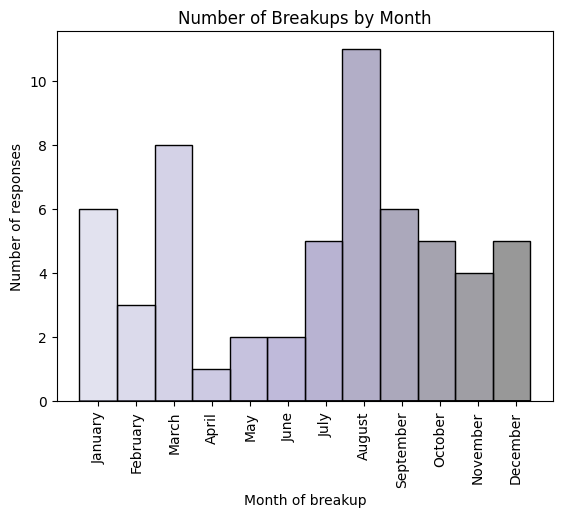

In [5]:
axes = sns.histplot(data=new_hate_data, x='breakup_start', binwidth=0.99, binrange=(1, 12), hue='breakup_start', palette='Purples_d')
axes.legend([],[], frameon = False)
monthList = ['January', 'February', 'March', 'April','May','June', 'July','August','September', 'October', 'November', 'December']
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5])
axes.set_xticklabels(monthList)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Month of breakup")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Breakups by Month")

Text(0.5, 1.0, 'Number of New Loves by Month')

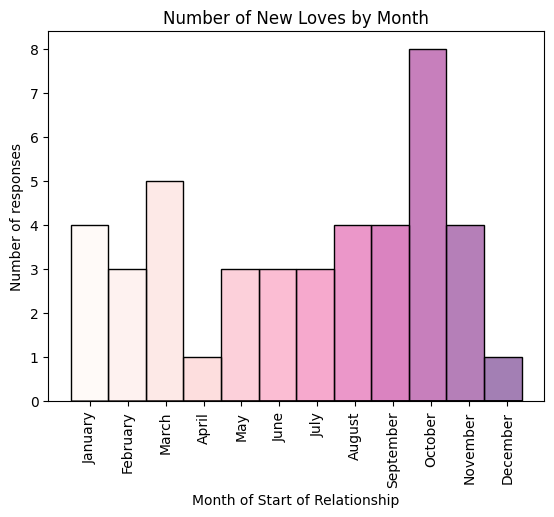

In [6]:
axes = sns.histplot(data = new_love_data, x = 'relationship_start', binwidth = .99, binrange = (1,12), hue = 'relationship_start', palette = 'RdPu')
axes.legend([],[], frameon = False)
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5])
axes.set_xticklabels(monthList)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Month of Start of Relationship")
axes.set_ylabel("Number of responses")
axes.set_title("Number of New Loves by Month")

Text(0.5, 1.0, 'Density of the Relationship Start and Breakup Start Variables')

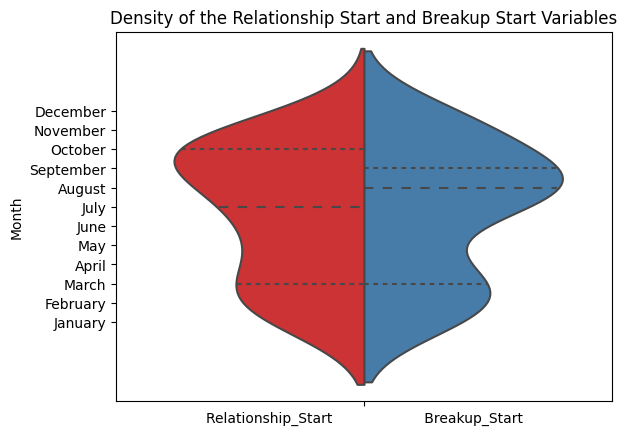

In [7]:
def renamer(toRename):
  if toRename == 'breakup_start':
    return 'relationship_start'
  else:
    return toRename

new_love_data['dataset'] = 'Relationships'
new_hate_data['dataset'] = 'Breakups'
combined_df = pd.concat([new_love_data[['relationship_start', 'dataset']], new_hate_data[['breakup_start', 'dataset']]])
melted_df = pd.melt(combined_df, id_vars=['dataset'], value_vars=['relationship_start', 'breakup_start'], var_name='Column')
melted_df['Column'] = melted_df['Column'].map(renamer)

axes = sns.violinplot(x='Column', y='value', hue='dataset', data=melted_df, split=True, inner='quartile', palette = sns.color_palette("Set1"))
axes.legend([],[], frameon = False)


axes.set_ylabel('Month')
axes.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
monthList = ['January', 'February', 'March', 'April','May','June', 'July','August','September', 'October', 'November', 'December']
axes.set_yticklabels(monthList)
axes.set_xlabel('')
axes.set_xticklabels(['Relationship_Start                     Breakup_Start'])
axes.set_title('Density of the Relationship Start and Breakup Start Variables')


Text(0.5, 1.0, 'Number of Breakups by Length of Relationship')

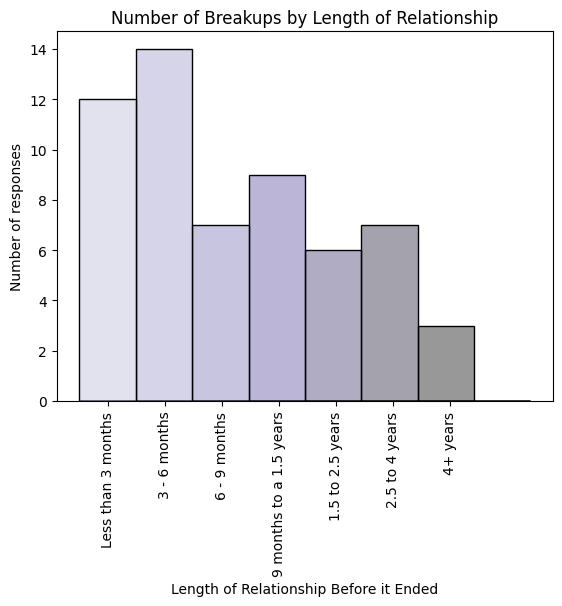

In [8]:
axes = sns.histplot(data = new_hate_data, x = 'breakup_length', binwidth = .99, binrange = (1,8), hue = 'breakup_length', palette = 'Purples_d')
axes.legend([],[], frameon = False)
monthList = ['Less than 3 months', '3 - 6 months','6 - 9 months','9 months to a 1.5 years','1.5 to 2.5 years','2.5 to 4 years','4+ years']
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5])
axes.set_xticklabels(monthList)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Length of Relationship Before it Ended")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Breakups by Length of Relationship")

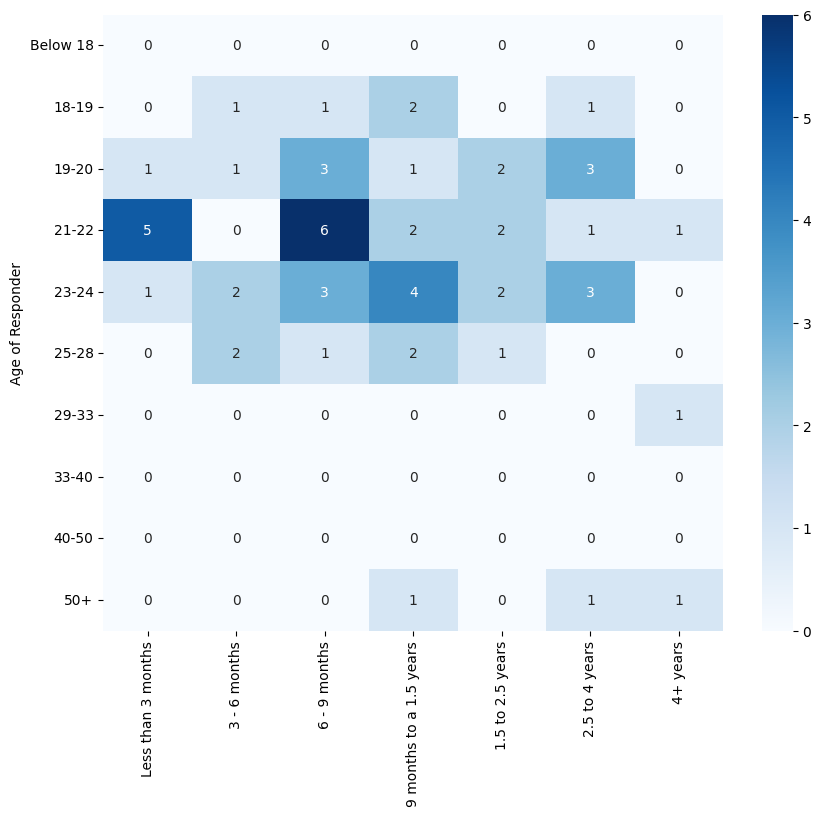

In [9]:
x_column = 'age'
y_column = 'breakup_length'

# Create a full grid of all possible combinations
grid = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10], columns=new_hate_data[y_column].unique())


# Fill in the counts where they exist in your dataset
for x_value in grid.index:
    for y_value in grid.columns:
        count = len(new_hate_data[(new_hate_data[x_column] == x_value) & (new_hate_data[y_column] == y_value)])
        grid.loc[x_value, y_value] = count
plt.figure(figsize=(10, 8))
axes = sns.heatmap(grid.fillna(0), annot=True, cmap= sns.color_palette("Blues", as_cmap=True), fmt='d')
ageList = ['Below 18', '18-19', '19-20','21-22','23-24','25-28','29-33', '33-40','40-50', '50+' ]
plt.ylabel('Age of Responder')
axes.set_yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,])
axes.set_yticklabels(ageList)
axes.set_xticks([.5,1.5,2.5,3.5,4.5,5.5,6.5])
axes.set_xticklabels(monthList)
axes.tick_params(axis='x', rotation=90)
axes.tick_params(axis='y', rotation=0)

Text(0.5, 1.0, 'Number of Relationships by Length of Relationship')

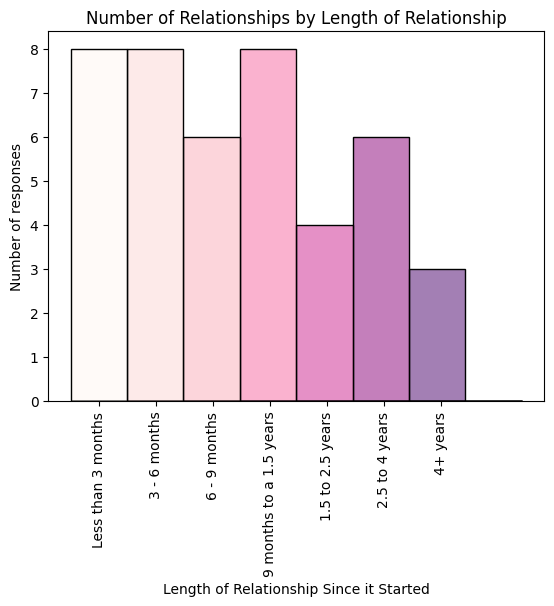

In [10]:
axes = sns.histplot(data = new_love_data, x = 'relationship_length', binwidth = .99, binrange = (1,8), hue = 'relationship_length', palette = 'RdPu')
axes.legend([],[], frameon = False)
monthList = ['Less than 3 months', '3 - 6 months','6 - 9 months','9 months to a 1.5 years','1.5 to 2.5 years','2.5 to 4 years','4+ years']
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5])
axes.set_xticklabels(monthList)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Length of Relationship Since it Started")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Relationships by Length of Relationship")

Text(0.5, 1.0, 'Number of Breakups by How Satisfying the Breakup Was')

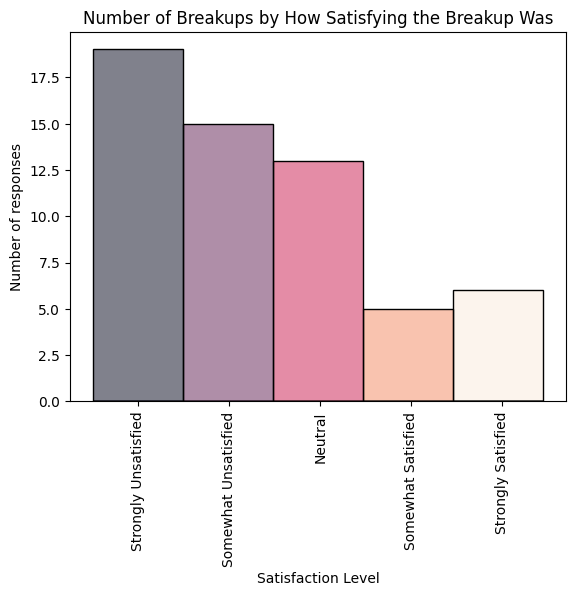

In [11]:
satisfaction_list = ['Strongly Unsatisfied', 'Somewhat Unsatisfied', 'Neutral','Somewhat Satisfied','Strongly Satisfied']
axes = sns.histplot(data = new_hate_data, x = 'breakup_satisfaction', binwidth = .99, binrange = (1,5), hue = 'breakup_satisfaction', palette = 'rocket')
axes.legend([],[], frameon = False)
axes.set_xticks([1.5,2.5,3.5,4.5,5.5])
axes.set_xticklabels(satisfaction_list)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Satisfaction Level")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Breakups by How Satisfying the Breakup Was")

Text(0.5, 1.0, 'Number of Relationships by How Satisfying the New Love is')

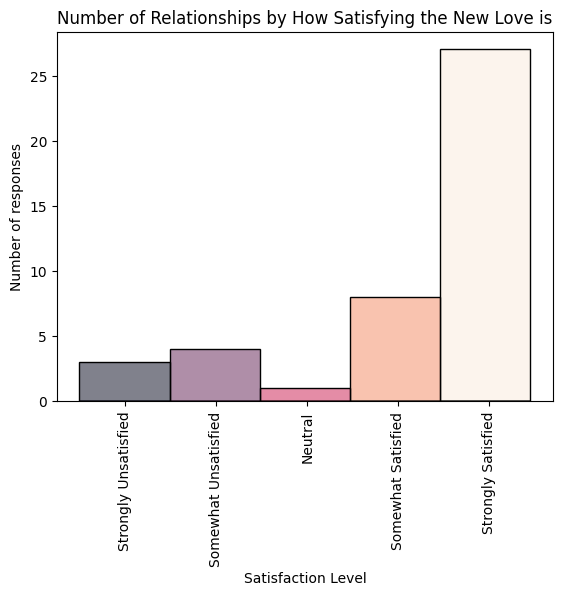

In [12]:
axes = sns.histplot(data = new_love_data, x = 'relationship_satisfaction', binwidth = .99, binrange = (1,5), hue = 'relationship_satisfaction', palette = 'rocket')
axes.legend([],[], frameon = False)
axes.set_xticks([1.5,2.5,3.5,4.5,5.5])
axes.set_xticklabels(satisfaction_list)
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel("Satisfaction Level")
axes.set_ylabel("Number of responses")
axes.set_title("Number of Relationships by How Satisfying the New Love is")

---
# **ML Analysis**

These are all the imports we should need to start working with our data.

In [48]:
#Standard Imports
import sklearn
import string
import re # helps you filter urls
from IPython.display import display, Latex, Markdown
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.metrics import accuracy_score

new_love_data['label'] = 1
new_hate_data['label'] = 0
love_data_uniform = new_love_data.rename(columns = {'relationship_start': 'start','relationship_length': 'length','relationship_satisfaction':'satisfaction',})
hate_data_uniform = new_hate_data.rename(columns = {'breakup_start': 'start','breakup_length': 'length','breakup_satisfaction':'satisfaction',})

total_data = pd.concat([love_data_uniform, hate_data_uniform], ignore_index=True)
total_data = total_data.drop('dataset', axis =1)
total_train, total_test = sklearn.model_selection.train_test_split(total_data, train_size = .8, test_size = .2)

labeler = lambda satisfactionRate: 0 if satisfactionRate < 4 else 1

labels = total_train['satisfaction'].apply(labeler)
import numpy as np
from scipy.stats import mode

class MajorityLabelClassifier:
    def __init__(self):
        self.most_frequent_label = None

    def fit(self, X, y):
        self.most_frequent_label = mode(y).mode[0]

    def predict(self, X):
         return [self.most_frequent_label] * len(X)

from sklearn.svm import SVC

def learn_classifier(X_train, y_train, kernel):
    classifier = SVC(kernel=kernel)
    classifier.fit(X_train, y_train)
    return classifier
train_no_labels = total_train.drop('label', axis = 1)
classifier = learn_classifier(train_no_labels, total_train['label'], 'linear')


def evaluate_classifier(classifier, X_validation, y_validation):
    """ evaluates a classifier based on a supplied validation data
    Inputs:
        classifier: sklearn.svm.classes.SVC: classifer to evaluate
        X_validation: scipy.sparse.csr.csr_matrix: sparse matrix of features
        y_validation: numpy.ndarray(int): dense binary vector of class labels
    Outputs:
        double: accuracy of classifier on the validation data
    """
    y_pred = classifier.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_pred)

    return accuracy

accuracy = evaluate_classifier(classifier, train_no_labels, labels)
print(accuracy)



0.9625


---
# **Conclusions and Results**
---
##A disclaimer: all conclusions would of couse be better made with additional sources of data, and in the event that data is received it can be seamlessly integrated using the already written API.
###1. The most common month to have your relationship come to a close is August, and the most common month to have your relationship start is in October, with September following close behind.

###This is probably just because a lot of major life events happen within the age groups that were disproportionally surveyed around the end of the summer, and as far as new relationships starting we feel it likely to be a result of the massively increased dating pool from the amount of people that break up in August.

###2. Satisfaction ended up being a better indicator for binary labeling, because of how wildly skewed people in relationships are to feel satisfied in their current relationships, with a satisfaction cutoff of 4, you are vastly more likely to be rating the satisfaction of a new relationship rather than an already happened breakup.

###3. Almost 50% of relationships do not last past 6 months. This is largely explained by a known psychological quantity known as the feelings gap, which posits that more long term affection only develops after this time period. If you reach that period where you have sustained long term affection, you are much much more likely to reach the much longer stages of the relationship.

##I am actually actively interested in keeping this tool running and collecting more data on it, so if you see some posts about it on the internet in the upcoming weeks you know where that data will be going! -Kaz

---
#The link to our group github submission is...
https://github.com/uic-ds-fall-2023/class-project-the-heart-breakers
